## Load necessary libraries

In [1]:
# Download necessary libraries
import pandas as pd 
import numpy as np 
from datetime import date 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from ipynb.fs.full.neuralNetwork import *


import copy
import matplotlib.pyplot as plt
import h5py
import scipy

from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.impute import SimpleImputer

np.random.seed(28)

# Step 1: Load dataset

In [2]:
regular_season = pd.read_csv('RegularSeasonStats.csv')
playoff = pd.read_csv('PlayoffStats.csv')

## Divide the data into training and test set

In [3]:
regular_season_copy = regular_season.copy()

# Define features and targets
X = regular_season_copy.drop(columns=['win'])
Y = regular_season_copy['win']

# Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 28, stratify = Y)

X_train, X_test = X_train.T, X_test.T

# Reshape the Y matrix
Y_train, Y_test = Y_train.to_numpy().reshape(1, -1), Y_test.to_numpy().reshape(1, -1)


# Step 2: Two-layer Neural Network

In [4]:
### Define the cosntant used through out
n_x = X_train.shape[0]
n_h = 4
n_y = 1
layer_dims = (n_x, n_h, n_y)


In [7]:
def two_layer_model(X, Y, layer_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID

    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if home team wins, 0 if home team losses), of shape (1, number of examples)
    layer_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations

    Returns:
    parametersa -- a dictionary containing W1, b1, W2, and b2
    """

    np.random.seed(28)
    grads = {}
    costs = []                  # to keep track of the cost function
    m = X.shape[1]              # number of examples
    (n_x, n_h, n_y) = layer_dims

    # Initialize parameters dictionary, using initialize_parameters(n_x, n_h, n_y)
    parameters = initialize_parameters(n_x, n_h, n_y)

    # Get W1, b1, W2, and b2 from the dictionary parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2".
        # Outputs: "A1, cache1, A2, cache2"
        A1, cache1 = linear_activataion_forward(X, W1, b1, activation = 'relu')
        A2, cache2 = linear_activataion_forward(A1, W2, b2, activation = 'sigmoid')

        # Compute cost
        cost = compute_cost(A2, Y)

        # Initializing backward propagation
        dA2 = -(np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))

        # Backward propagation. Inputs: "dA2, cache2, cache1".
        # Outputs: "dA1, dW2, db2, dA0, dW1, db1"
        dA1, dW2, db2 = linear_activataion_backward(dA2, cache2, activation = 'sigmoid')
        dA0, dW1, db1 = linear_activataion_backward(dA1, cache1, activation = 'relu')

        # Set grads['dWl'] to dW1, grasd['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2

        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']

        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6935549804781725
Cost after iteration 100: 0.6884578895507579
Cost after iteration 200: 0.6852330883537805
Cost after iteration 300: 0.6830007334000741
Cost after iteration 400: 0.681359532827352
Cost after iteration 500: 0.679418789209043
Cost after iteration 600: 0.6751605946538753
Cost after iteration 700: 0.6662377145117989
Cost after iteration 800: 0.6584516687330455
Cost after iteration 900: 0.6551085002006889
Cost after iteration 1000: 0.6521830912038643
Cost after iteration 1100: 0.641864842184397
Cost after iteration 1200: 0.6571798821925028
Cost after iteration 1300: 0.6440061479639086
Cost after iteration 1400: 0.6397616130413316
Cost after iteration 1500: 0.637765197033752
Cost after iteration 1600: 0.6355173344886123
Cost after iteration 1700: 0.6337381536885984
Cost after iteration 1800: 0.6324768041985777
Cost after iteration 1900: 0.6310641003382588


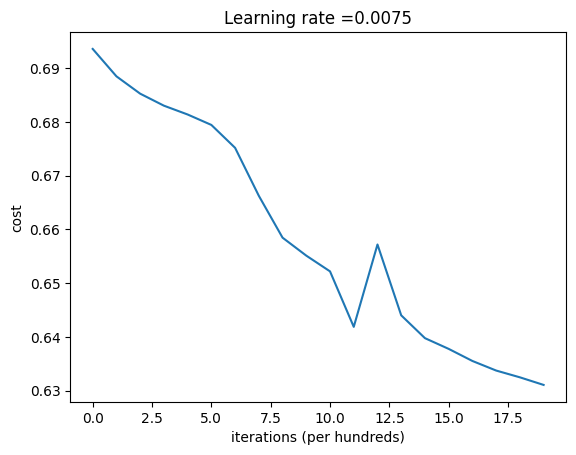

In [8]:
parameters = two_layer_model(X_train, Y_train, layer_dims = (n_x, n_h, n_y), num_iterations = 2000, print_cost = True)